In [37]:
#import the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
data=pd.read_csv(r"C:\Users\Namukaba Katambo\Desktop\NK\Datasets for practice\world-data-2023.csv")
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
data.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [4]:
#Converting the Object Data types to numerical values
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace(',', '').astype(float)
data['Agricultural Land( %)'] = data['Agricultural Land( %)'].str.replace('%', '').astype(float)
data['Land Area(Km2)'] = data['Land Area(Km2)'].str.replace(',', '').astype(float)
data['Co2-Emissions'] = data['Co2-Emissions'].str.replace(',', '').astype(float)
data['Urban_population'] = data['Urban_population'].str.replace(',', '').astype(float)
data['CPI Change (%)'] = data['CPI Change (%)'].str.replace('%', '').astype(float)
data['Forested Area (%)'] = data['Forested Area (%)'].str.replace('%', '').astype(float)
data['Gross primary education enrollment (%)'] = data['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)
data['Gross tertiary education enrollment (%)'] = data['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)
data['Population: Labor force participation (%)'] = data['Population: Labor force participation (%)'].str.replace('%', '').astype(float)
data['Tax revenue (%)'] = data['Tax revenue (%)'].str.replace('%', '').astype(float)
data['Armed Forces size'] = data['Armed Forces size'].str.replace(',', '').astype(float)
data['CPI'] = data['CPI'].str.replace(',', '').astype(float)
data['Gasoline Price'] = data['Gasoline Price'].str.replace('$', '').astype(float)
data['Unemployment rate'] = data['Unemployment rate'].str.replace('%', '').astype(float)
data['Total tax rate'] = data['Total tax rate'].str.replace('%', '').astype(float)
data['Population'] = data['Population'].str.replace(',', '').astype(float)
data['Minimum wage'] = data['Minimum wage'].str.replace('$', '').astype(float)
data['Out of pocket health expenditure'] = data['Out of pocket health expenditure'].str.replace('%', '').astype(float)
data['GDP'] = data['GDP'].str.replace('$', '')
data['GDP'] = data['GDP'].str.replace(',', '').astype(float)

In [5]:
data.dtypes

Country                                       object
Density\n(P/Km2)                             float64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [6]:
#removing columns with no value for this project including logitute and latitude which can affect the clustering due to location
data.drop(columns=['Abbreviation','Calling Code','Capital/Major City','Latitude','Longitude','Currency-Code','Largest city','Official language'], inplace=True)

In [7]:
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population'],
      dtype='object')

In [8]:
data.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,1.880000e+02,178.000000,179.000000,188.000000,188.000000,...,181.000000,150.000000,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,1.777992e+05,190.460955,6.722346,2.698138,32.015426,...,160.392265,2.194133,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,8.387903e+05,397.947380,24.450414,1.282267,23.791331,...,233.502024,2.970796,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,...,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,2.304250e+03,113.885000,1.000000,1.705000,11.000000,...,13.000000,0.402500,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,1.230300e+04,125.340000,2.300000,2.245000,32.000000,...,53.000000,1.045000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,6.388425e+04,157.265000,4.250000,3.597500,48.175000,...,186.000000,2.447500,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,...,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08


In [9]:
data.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                 

In [10]:
df=data.dropna()
df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,...,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,...,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,...,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
4,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,...,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0
6,Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,...,39.0,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0


In [11]:
df.shape

(120, 27)

In [12]:
df.set_index('Country', inplace=True)
df.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0
Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,9.8,...,39.0,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0


In [36]:
type(df)

pandas.core.frame.DataFrame

In [14]:
#saving the cleaned dataframe to be used for the next clustering methods
df.to_csv('data.csv')

# Correlation Between variables

<AxesSubplot:>

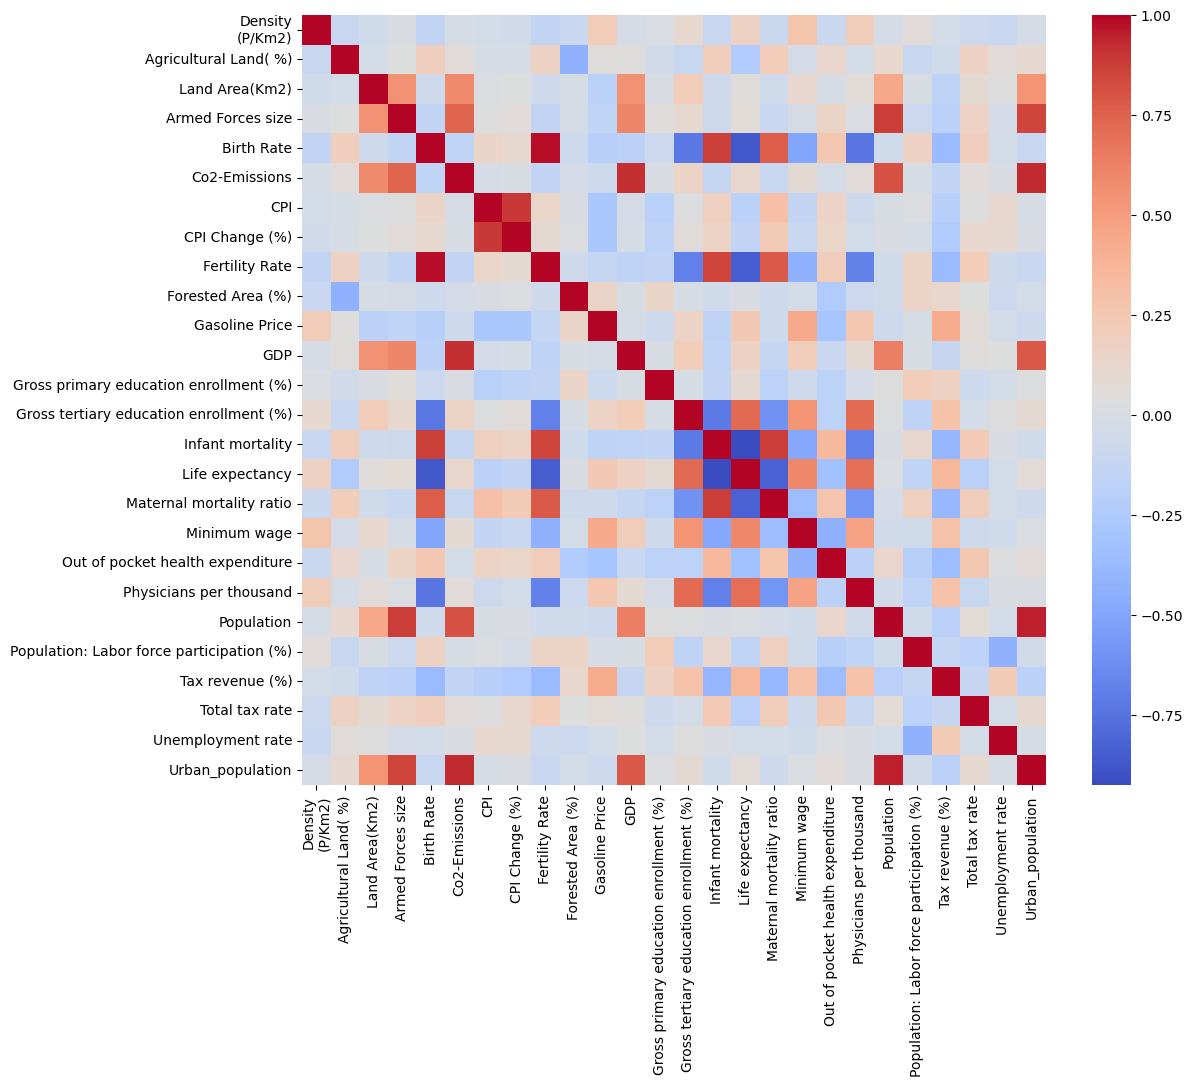

In [15]:
#correlation between the variables
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')

# Standardize the data

In [17]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=scaler.fit_transform(df)

K-means clustering is based on the distance between data points. By standardizing the features to have a mean of 0 and a standard deviation of 1, all features are treated equally in terms of their influence on the clustering process. This is important because K-means is a distance-based algorithm, and features with larger scales could dominate the clustering process
Standardization ensures that each feature has the same weight during the computation of cluster centers (centroids). When features are on different scales, some features may have a larger influence on the cluster centers, leading to suboptimal results.

# K means Clustering

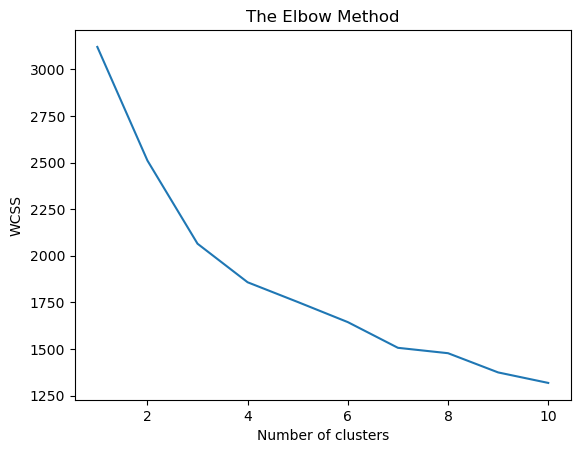

In [18]:
#using the Elbow Method to determine the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df1)

KMeans(max_iter=50, n_clusters=4)

In [20]:
 kmeans.labels_

array([1, 3, 3, 1, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 3, 3, 3, 0, 1, 1, 3, 1,
       0, 1, 0, 2, 3, 1, 3, 0, 0, 1, 3, 3, 0, 3, 0, 1, 1, 3, 0, 1, 0, 3,
       3, 0, 2, 3, 3, 3, 0, 0, 3, 0, 3, 3, 1, 3, 3, 1, 0, 3, 1, 1, 0, 0,
       1, 1, 3, 1, 0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 0, 3, 1, 1, 3, 1, 1, 3,
       3, 3, 0, 0, 0, 2, 3, 1, 3, 1, 0, 0, 0, 0, 3, 1, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 1, 3, 0, 2, 0, 3, 1])

# Cluster Identification for each country

In [21]:
df['Cluster_Id'] = kmeans.labels_
df.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,1
Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,3
Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,3
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,9.8,...,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,3


In [22]:
df[df['Cluster_Id']==0]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
Country,,,,,,,,,,,,,,,,,,,,,
Australia,3.0,48.2,7741220.0,58000.0,12.60,375908.0,119.80,1.6,1.74,16.3,...,13.59,19.6,3.68,25766605.0,65.5,23.0,47.4,5.27,21844756.0,0
Barbados,668.0,23.3,430.0,1000.0,10.65,1276.0,134.09,4.1,1.62,14.7,...,3.13,45.2,2.48,287025.0,65.2,27.5,35.6,10.33,89431.0,0
Belgium,383.0,44.6,30528.0,32000.0,10.30,96889.0,117.11,1.4,1.62,22.6,...,10.31,17.6,3.07,11484055.0,53.6,24.0,55.4,5.59,11259082.0,0
Bulgaria,64.0,46.3,110879.0,31000.0,8.90,41708.0,114.42,3.1,1.56,35.4,...,1.57,47.7,4.03,6975761.0,55.4,20.2,28.3,4.34,5256027.0,0
Canada,4.0,6.9,9984670.0,72000.0,10.10,544894.0,116.76,1.9,1.50,38.2,...,9.51,14.6,2.61,36991981.0,65.1,12.8,24.5,5.56,30628482.0,0
Chile,26.0,21.2,756096.0,122000.0,12.43,85822.0,131.91,2.6,1.65,24.3,...,2.00,32.2,2.59,18952038.0,62.6,18.2,34.0,7.09,16610135.0,0
Croatia,73.0,27.6,56594.0,18000.0,9.00,17488.0,109.82,0.8,1.47,34.4,...,2.92,15.2,3.00,4067500.0,51.2,22.0,20.5,6.93,2328318.0,0
Czech Republic,139.0,45.2,78867.0,23000.0,10.70,102218.0,116.48,2.8,1.69,34.6,...,3.00,14.8,4.12,10669709.0,60.6,14.9,46.1,1.93,7887156.0,0
Estonia,31.0,23.1,45228.0,6000.0,10.90,16590.0,122.14,2.3,1.59,51.3,...,3.14,22.8,4.48,1331824.0,63.6,20.9,47.8,5.11,916024.0,0


In [23]:
df[df['Cluster_Id']==1]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,1
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
Benin,108.0,33.3,112622.0,12000.0,36.22,6476.0,110.71,-0.9,4.84,37.8,...,0.39,40.5,0.08,11801151.0,70.9,10.8,48.9,2.23,5648149.0,1
Burkina Faso,76.0,44.2,274200.0,11000.0,37.93,3418.0,106.58,-3.2,5.19,19.3,...,0.34,36.1,0.08,20321378.0,66.4,15.0,41.3,6.26,6092349.0,1
Ivory Coast,83.0,64.8,322463.0,27000.0,35.74,9674.0,111.61,-0.9,4.65,32.7,...,0.36,36.0,0.23,25716544.0,57.0,11.8,50.1,3.32,13176900.0,1
Cameroon,56.0,20.6,475440.0,24000.0,35.39,8291.0,118.65,2.5,4.57,39.3,...,0.35,69.7,0.09,25876380.0,76.1,12.8,57.7,3.38,14741256.0,1
Central African Republic,8.0,8.2,622984.0,8000.0,35.35,297.0,186.86,37.1,4.72,35.6,...,0.37,39.6,0.06,4745185.0,72.0,8.6,73.3,3.68,1982064.0,1
Republic of the Congo,16.0,31.1,342000.0,12000.0,32.86,3282.0,124.74,2.2,4.43,65.4,...,0.88,43.8,0.12,5380508.0,69.4,9.0,54.3,9.47,3625010.0,1
Democratic Republic of the Congo,40.0,11.6,2344858.0,134000.0,41.18,2021.0,133.85,2.9,5.92,67.2,...,0.18,37.4,0.07,86790567.0,63.5,10.7,50.7,4.24,39095679.0,1


In [24]:
df[df['Cluster_Id']==2]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
Country,,,,,,,,,,,,,,,,,,,,,
China,153.0,56.2,9596960.0,2695000.0,10.90,9893038.0,125.08,2.9,1.69,22.4,...,0.87,32.4,1.98,1.397715e+09,68.0,9.4,59.2,4.32,842933962.0,2
India,464.0,60.4,3287263.0,3031000.0,17.86,2407672.0,180.44,7.7,2.22,23.8,...,0.30,65.1,0.86,1.366418e+09,49.3,11.2,49.7,5.36,471031528.0,2
Russia,9.0,13.3,17098240.0,1454000.0,11.50,1732027.0,180.75,4.5,1.57,49.8,...,0.53,36.4,4.01,1.443735e+08,61.8,11.4,46.2,4.59,107683889.0,2
United States,36.0,44.4,9833517.0,1359000.0,11.60,5006302.0,117.24,7.5,1.73,33.9,...,7.25,11.1,2.61,3.282395e+08,62.0,9.6,36.6,14.70,270663028.0,2


In [25]:
df[df['Cluster_Id']==3]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
Country,,,,,,,,,,,,,,,,,,,,,
Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,3
Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,3
Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,9.8,...,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,3
Armenia,104.0,58.9,29743.0,49000.0,13.99,5156.0,129.18,1.4,1.76,11.7,...,0.66,81.6,4.40,2957731.0,55.6,20.9,22.6,16.99,1869848.0,3
Azerbaijan,123.0,57.7,86600.0,82000.0,14.00,37620.0,156.32,2.6,1.73,14.1,...,0.47,78.6,3.45,10023318.0,66.5,13.0,40.7,5.51,5616165.0,3
The Bahamas,39.0,1.4,13880.0,1000.0,13.97,1786.0,116.22,2.5,1.75,51.4,...,5.25,27.8,1.94,389482.0,74.6,14.8,33.8,10.36,323784.0,3
Bangladesh,1265.0,70.6,148460.0,221000.0,18.18,84246.0,179.68,5.6,2.04,11.0,...,0.51,71.8,0.58,167310838.0,59.0,8.8,33.4,4.19,60987417.0,3
Belize,17.0,7.0,22966.0,2000.0,20.79,568.0,105.68,-0.9,2.31,59.7,...,1.65,22.7,1.12,390353.0,65.1,26.3,31.1,6.41,179039.0,3
Bhutan,20.0,13.6,38394.0,6000.0,17.26,1261.0,167.18,2.7,1.98,72.5,...,0.32,19.8,0.42,727145.0,66.7,16.0,35.3,2.34,317538.0,3


In [26]:
#adding the coutry column back into the data frame
df_reset = df.reset_index()
df_reset.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_Id
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,...,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,1
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,...,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,3
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,...,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,3
3,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
4,Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,...,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,3


In [27]:
clustered_countries = df_reset.groupby('Cluster_Id')['Country'].count()
clustered_countries

Cluster_Id
0    31
1    32
2     4
3    53
Name: Country, dtype: int64

# Pairplots displaying clusters 

In [42]:
#creating Subsets of the main DF
var=['Unemployment rate','Birth Rate','Co2-Emissions','Cluster_Id']
sub_var=df[var]

In [46]:
#creating Subsets of the main DF
var1=['Infant mortality','Life expectancy','CPI']
sub_var1=df[var]

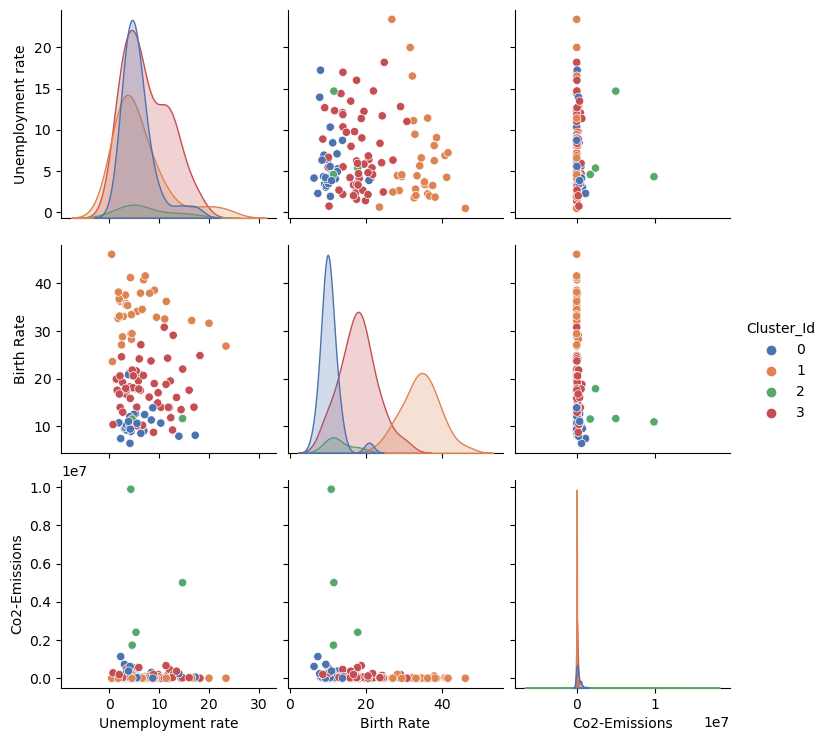

In [49]:
sns.pairplot(sub_var, hue ='Cluster_Id',palette='deep')

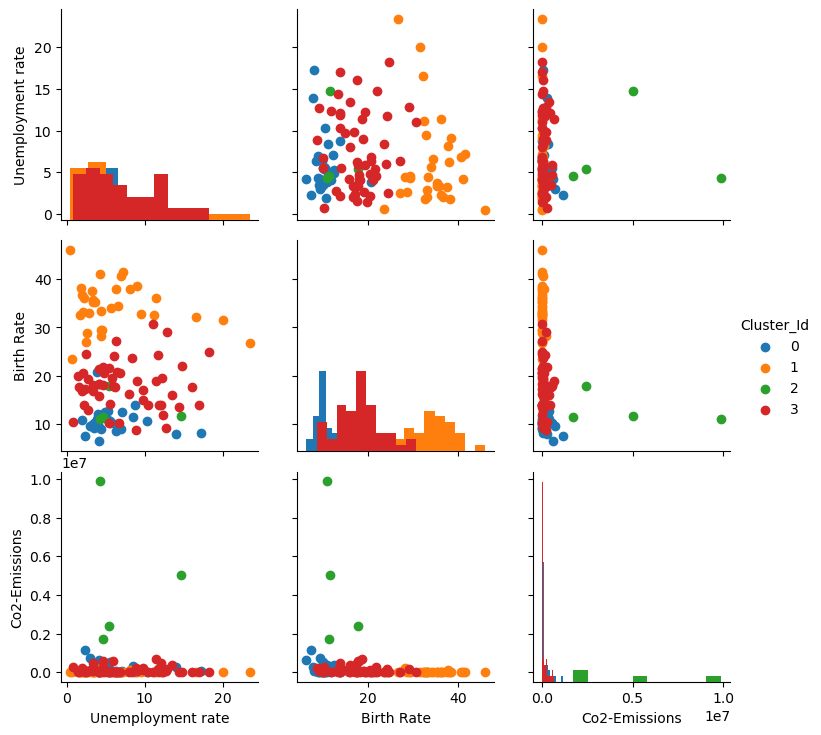

In [51]:
graph = sns.PairGrid(sub_var1, hue ='Cluster_Id')
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

In the next Part of this analysis i will carry out the same analysis with a didfferent clustering models and conclude on how the results vary depending on what model is selected.